### Batch: PROJECT PLANNER JULY 2023

### Data Science Internship

### Task 1: Human Activity Recognition with R Language

#### Intern: Khushboo Singh

### BUSINESS CASE: Human Activity Recognition with R Language

### Dataset Description :

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

In [4]:
### Importing necessary libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time

In [5]:
debut_chrono = time.time()

In [7]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
HAR_data = pd.concat([train_data, test_data])

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

Duration :  142.51285028457642  s


### Data cleaning

#### Checking presence of duplicates 

In [8]:
debut_chrono = time.time()

print("Number of duplicates : " + str(HAR_data.duplicated().sum()))

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

Number of duplicates : 0
Duration :  0.5662565231323242  s


### Checking the missing values

In [9]:
debut_chrono = time.time()

print("Number of missing values : ",HAR_data.isna().sum())

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

Number of missing values :  tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
Duration :  0.02590322494506836  s


#### Conclusion :
There are no duplicates or missing values.

### Exploratory Data Analysis

In [11]:
debut_chrono = time.time()

n_rows = HAR_data.shape[0]
n_columns = HAR_data.shape[1]
print("The dataset includes: ",n_rows," Rows ",n_columns,"columns")

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

The dataset includes:  10299  Rows  563 columns
Duration :  0.0010025501251220703  s


In [13]:
debut_chrono = time.time()

print(HAR_data.head())

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [14]:
debut_chrono = time.time()

print(HAR_data.describe())

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   


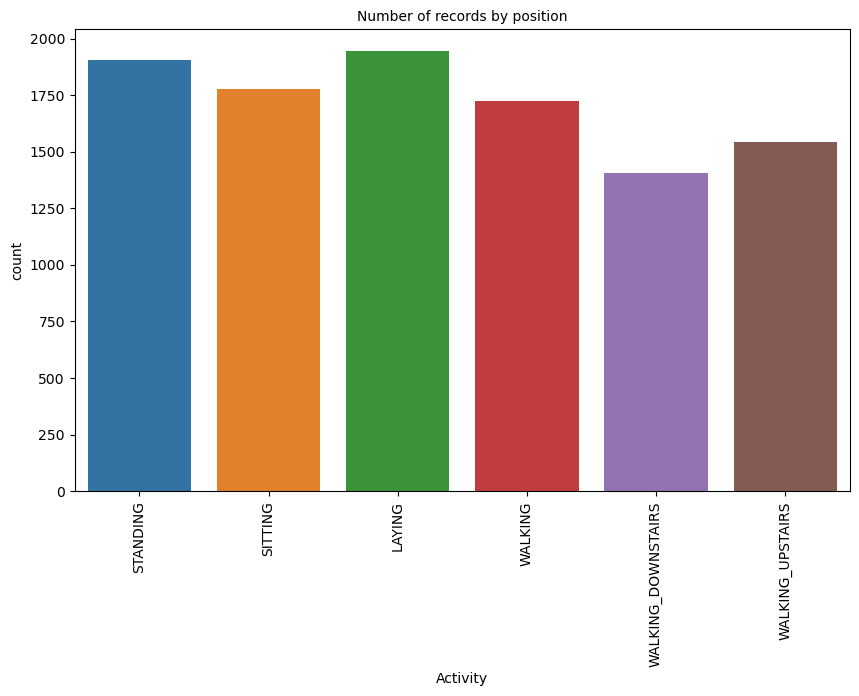

Duration :  0.2988603115081787  s


In [21]:
debut_chrono = time.time()

plt.figure(figsize=(10,6))
sns.countplot(x='Activity', data=HAR_data)
plt.title('Number of records by position', fontsize=10)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

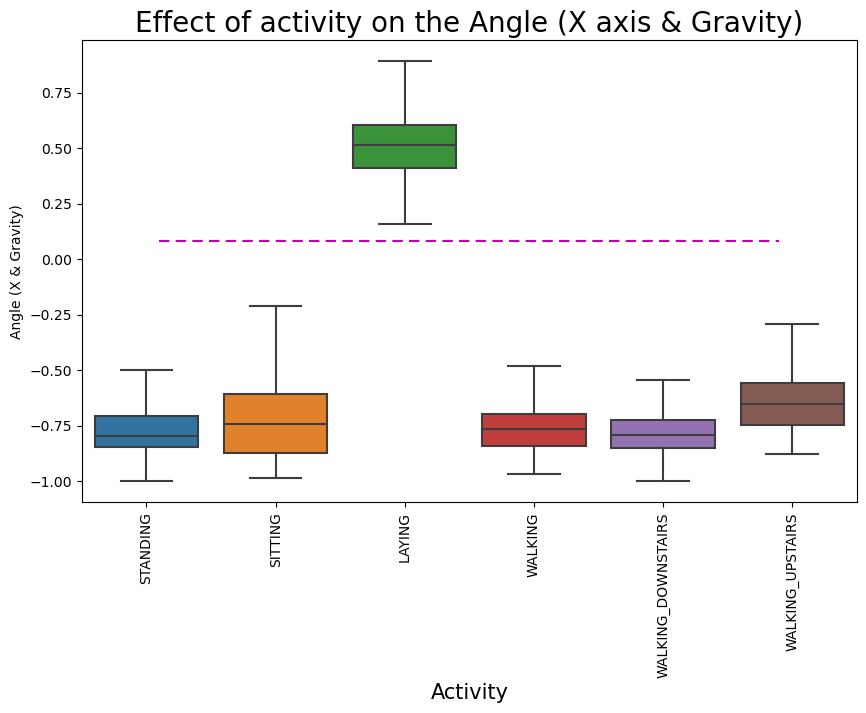

In [19]:
debut_chrono = time.time()

plt.figure(figsize=(10,6))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=HAR_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=20)
plt.xlabel("Activity", size=15)
plt.ylabel('Angle (X & Gravity)', size=10)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

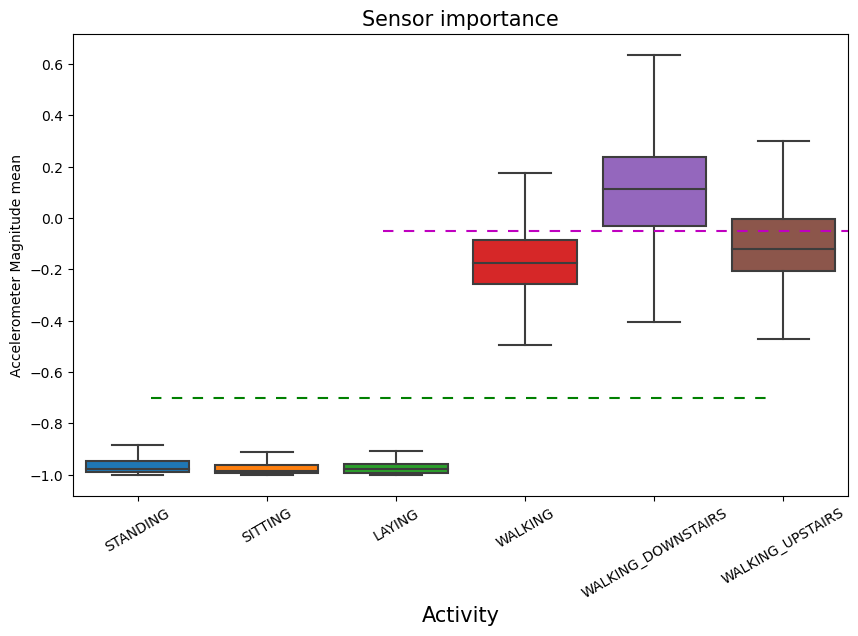

Duration :  0.34639620780944824  s


In [24]:
debut_chrono = time.time()

plt.figure(figsize=(10,6))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=HAR_data, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 15)
plt.xlabel("Activity", size=15)
plt.ylabel('Accelerometer Magnitude mean', size=10)
plt.xticks(rotation=30, fontsize=10)
plt.show()

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

### Predictive Data Analysis

#### To do a predictive analysis, we need:

* Prepare the data

* Create a model

### Data Preparation

In [25]:
debut_chrono = time.time()

train_data = HAR_data.drop(['subject', 'Activity'], axis=1)
train_label = HAR_data['Activity']

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

Duration :  0.041991472244262695  s


#### Separation of the dataset:
Separate data set into 2 parts:

* The first for model training (80% of data)
* The second for the model accuracy test (20% of the data)

In [26]:
debut_chrono = time.time()

x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2, shuffle=True, random_state=42)

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

Duration :  0.06827688217163086  s


### Model creation

In [27]:
debut_chrono = time.time()

knn = KNeighborsClassifier(n_neighbors=8).fit(x_train, y_train)

fin_chrono = time.time()
print("Duration: ", fin_chrono-debut_chrono, " s")

Duration:  0.06924295425415039  s


In [28]:
debut_chrono = time.time()

test_accuracy = metrics.accuracy_score(y_test, knn.predict(x_test))
    
    
print("Accuracy {}".format(test_accuracy*100))

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

Accuracy 95.72815533980582
Duration :  0.8368721008300781  s


* Confusion matrix

Duration :  0.8324861526489258  s


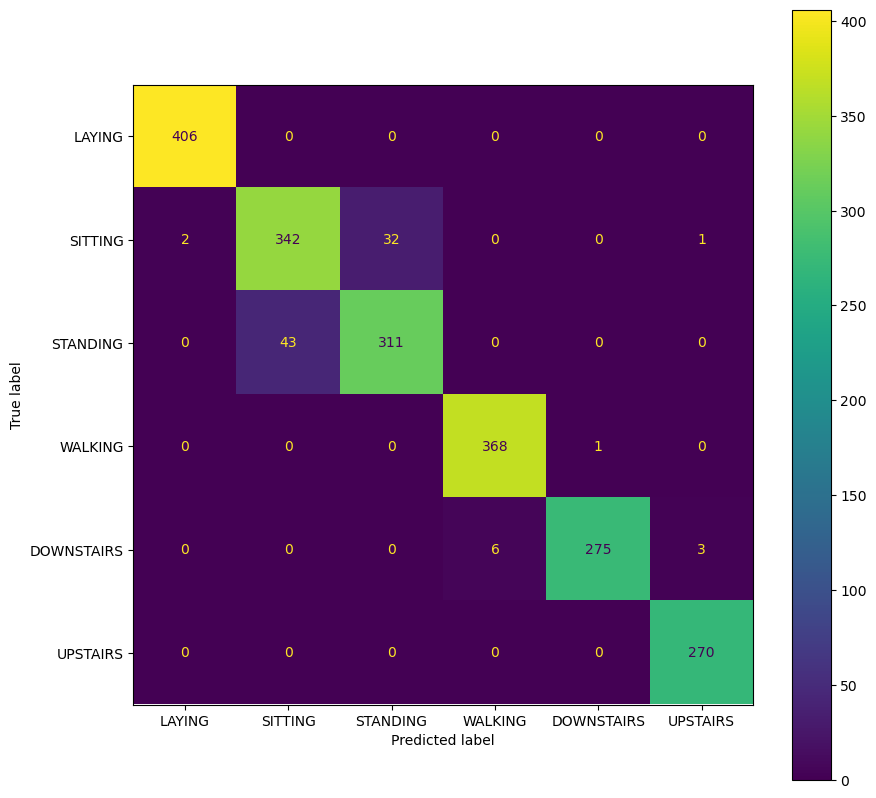

In [29]:
debut_chrono = time.time()

actual = y_test
predicted = knn.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
   'UPSTAIRS'])

fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display.plot(ax=ax)

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

In [30]:
debut_chrono = time.time()

person = x_test.head(1)
expected_result = y_test.head(1)

result = knn.predict(person)

print("Predicted Position : ", result[0], "\nPosition to find was : ", expected_result.get(expected_result.keys()[0]))

fin_chrono = time.time()
print("Duration : ", fin_chrono-debut_chrono, " s")

Predicted Position :  WALKING 
Position to find was :  WALKING
Duration :  0.1587977409362793  s
